## Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable = True)
%matplotlib inline

## Read in Data

In [2]:
# Read in data
df = pd.read_csv('covid19_tweets.csv')

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         117601 non-null  object
 1   user_location     93891 non-null   object
 2   user_description  111036 non-null  object
 3   user_created      117601 non-null  object
 4   user_followers    117601 non-null  int64 
 5   user_friends      117601 non-null  int64 
 6   user_favourites   117601 non-null  int64 
 7   user_verified     117601 non-null  bool  
 8   date              117601 non-null  object
 9   text              117601 non-null  object
 10  hashtags          83763 non-null   object
 11  source            117567 non-null  object
 12  is_retweet        117601 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 10.1+ MB


None

In [4]:
display(df.describe())

,user_followers,user_friends,user_favourites
count,1.176010e+05,117601.000000,1.176010e+05
mean,1.052375e+05,2114.084302,1.450395e+04
std,8.257965e+05,9175.793302,4.479333e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.740000e+02,154.000000,2.140000e+02
50%,9.980000e+02,552.000000,1.812000e+03
75%,5.264000e+03,1729.000000,9.390000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [31]:
display(df.isnull().count())

df = df.dropna()
df = df.reset_index(drop = True)

user_name           65368
user_location       65368
user_description    65368
user_created        65368
user_followers      65368
user_friends        65368
user_favourites     65368
user_verified       65368
date                65368
text                65368
hashtags            65368
source              65368
is_retweet          65368
dtype: int64

In [12]:
# Display top 5 records
display(df.head(5))

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
1,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
2,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
3,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
4,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False


## EDA

In [54]:
# Top 10 Tweeters
tweet_user = pd.DataFrame(df['user_name'].value_counts().sort_values(ascending = False)[:10]).T

colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = go.Figure(data = [go.Bar(x = tweet_user.columns,
                                y = [tweet_user[i][0] for i in tweet_user],
                                marker_color = colors)])
fig.update_layout(title_text = 'Tweets by User')

In [52]:
# Top 10 locations
tweet_location = pd.DataFrame(df['user_location'].value_counts().sort_values(ascending = False)[:10]).T

colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = go.Figure(data = [go.Bar(x = tweet_location.columns,
                                y = [tweet_location[i][0] for i in tweet_location],
                                marker_color = colors)])
fig.update_layout(title_text = 'Tweets on User Location')

In [51]:
# Top 15 Tweet sources
tweet_source = pd.DataFrame(df['source'].value_counts().sort_values(ascending = False)[:15]).T
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = go.Figure(data = [go.Bar(x = tweet_source.columns,
                                y = [tweet_source[i][0] for i in tweet_source],
                                marker_color = colors)])
fig.update_layout(title_text = 'Tweets on User Source')

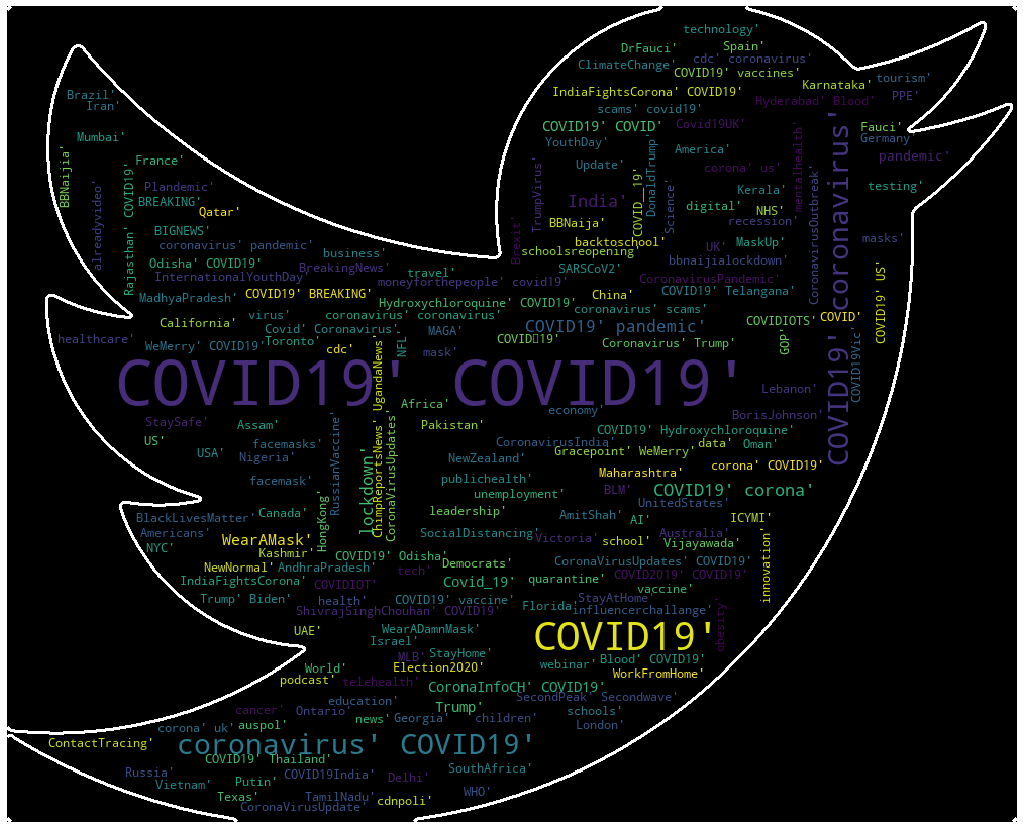

In [63]:
# Word Cloud of all hashtags

words = ' '.join(df['hashtags'])

from scipy.misc.pilutil import imread
twitter_mask = imread('twitter_mask.png', flatten=True)

plt.figure(figsize = (20,15))
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      mask=twitter_mask,
                      contour_width = 3,
                      contour_color = 'white',
                      min_font_size= 12
            ).generate(words)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
plt.show()


## Sentiment Analysis